In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [4]:
## Loading the data file and checking the first 10 rows
df1 = pd.read_csv("loan.csv", low_memory=False)
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
## Figuring out the data types used for every column to check if it is a categorical column or continuous
df1.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [6]:
## Finding the unique values on every column
df1.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19614
zip_code                            823
addr_state                           50
dti                                2868


Checking the % of NULL values in each of the columns

In [7]:
round(100*df1.isnull().sum()/len(df1),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
#Looking for outliers
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

DATA CLEANING - There are multiple columns with 100% null value, so dropping them to make the data more concise

In [9]:
# Dropping columns with all values as null
df1 = df1.dropna(how='all', axis=1)

In [10]:
# Looking for outliers
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [11]:
cols = list(df1.columns)

Plotting categorical values of columns to numerical values

In [12]:
df1["loan_status"] = df1["loan_status"].astype('category')
df1["loan_status_numeric"] = df1["loan_status"].cat.codes
df1["term"] = df1["term"].astype('category')
df1["term_numeric"] = df1["term"].cat.codes
df1["grade"] = df1["grade"].astype('category')
df1["grade_numeric"] = df1["grade"].cat.codes
df1["sub_grade"] = df1["sub_grade"].astype('category')
df1["sub_grade_numeric"] = df1["sub_grade"].cat.codes
df1["home_ownership"] = df1["home_ownership"].astype('category')
df1["home_ownership_numeric"] = df1["home_ownership"].cat.codes
df1["verification_status"] = df1["verification_status"].astype('category')
df1["verification_status_numeric"] = df1["verification_status"].cat.codes

Getting rid off the currently ongoing loans

In [13]:
df_charged_off = df1[df1['loan_status_numeric']== 0]
df_fully_paid = df1[df1['loan_status_numeric']== 2]

In [14]:
print(cols)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


# UNIVARIATE ANALYSIS

In [15]:
number_of_defaulters = len(df_charged_off['member_id'].unique())
number_of_non_defaulters = len(df_fully_paid['member_id'].unique())
print('number_of_defaulters :',number_of_defaulters)
print('number_of_non_defaulters :',number_of_non_defaulters)

number_of_defaulters : 5627
number_of_non_defaulters : 32950


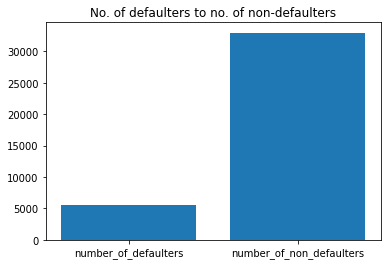

In [16]:
plt.bar(['number_of_defaulters', 'number_of_non_defaulters'], [number_of_defaulters, number_of_non_defaulters])
plt.title("No. of defaulters to no. of non-defaulters")
plt.show()

Default Rate grade-wise

In [17]:
list_of_grades = list(df_charged_off['grade'].unique())
print(list_of_grades)
list_of_defaulters_per_grade = []
for grade in list_of_grades:
    #print(grade)
    list_of_defaulters_per_grade.append(len(df_charged_off[df_charged_off['grade']==grade]))
print(list_of_defaulters_per_grade)

['C', 'F', 'B', 'D', 'A', 'E', 'G']
[1347, 319, 1425, 1118, 602, 715, 101]


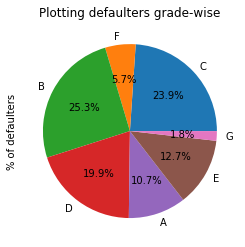

In [18]:
plt.pie(list_of_defaulters_per_grade, labels=list_of_grades, autopct='%1.1f%%')
plt.ylabel('% of defaulters')
plt.title('Plotting defaulters grade-wise')
plt.show()

Default Rate term-wise

In [19]:
list_of_terms = list(df_charged_off['term'].unique())
print(list_of_terms)
list_of_defaulters_per_term = []
for term in list_of_terms:
    #print(term)
    list_of_defaulters_per_term.append(len(df_charged_off[df_charged_off['term']==term]))
print(list_of_defaulters_per_term)

[' 60 months', ' 36 months']
[2400, 3227]


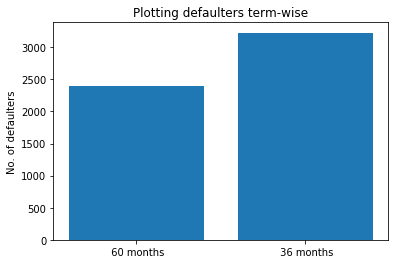

In [20]:
plt.bar(list_of_terms, list_of_defaulters_per_term)
plt.ylabel('No. of defaulters')
plt.title('Plotting defaulters term-wise')
plt.show()

Default rate sub-grade wise

In [21]:
list_of_grades = list(df_charged_off['sub_grade'].unique())
print(list_of_grades)
list_of_defaulters_per_grade = []
for grade in list_of_grades:
    #print(grade)
    list_of_defaulters_per_grade.append(len(df_charged_off[df_charged_off['sub_grade']==grade]))
print(list_of_defaulters_per_grade)

['C4', 'F2', 'B5', 'C1', 'B2', 'B4', 'B3', 'C2', 'D2', 'A5', 'B1', 'C5', 'E4', 'D3', 'D5', 'A2', 'C3', 'A3', 'F1', 'D1', 'A4', 'E5', 'E1', 'E3', 'D4', 'G2', 'G1', 'E2', 'F5', 'F3', 'F4', 'A1', 'G4', 'G3', 'G5']
[212, 70, 356, 336, 228, 329, 341, 321, 271, 217, 171, 208, 126, 256, 209, 74, 270, 103, 91, 167, 178, 109, 198, 119, 215, 28, 31, 163, 54, 51, 53, 30, 13, 19, 10]


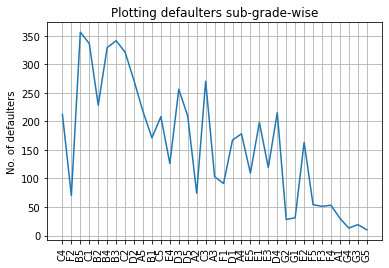

In [22]:
fig, ax = plt.subplots()
plt.plot(list_of_grades, list_of_defaulters_per_grade)
plt.ylabel('No. of defaulters')
plt.title('Plotting defaulters sub-grade-wise')
plt.xticks(rotation=90)
ax.grid()
plt.show()

In [23]:
list_of_purposes = list(df_charged_off['purpose'].unique())
print(list_of_purposes)
list_of_defaulters_per_purpose = []
for purpose in list_of_purposes:
    #print(grade)
    list_of_defaulters_per_purpose.append(len(df_charged_off[df_charged_off['purpose']==purpose]))
print(list_of_defaulters_per_purpose)

['car', 'small_business', 'other', 'debt_consolidation', 'major_purchase', 'credit_card', 'home_improvement', 'moving', 'vacation', 'house', 'medical', 'wedding', 'renewable_energy', 'educational']
[160, 475, 633, 2767, 222, 542, 347, 92, 53, 59, 106, 96, 19, 56]


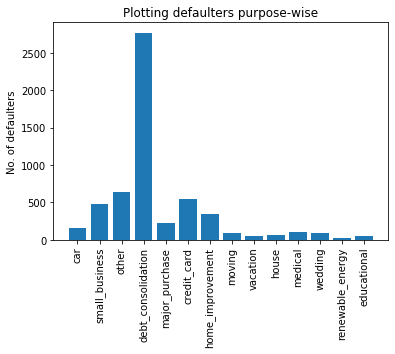

In [24]:
plt.bar(list_of_purposes, list_of_defaulters_per_purpose)
plt.ylabel('No. of defaulters')
plt.xticks(rotation=90)
plt.title('Plotting defaulters purpose-wise')
plt.show()

In [25]:
list_of_ownerships = list(df_charged_off['home_ownership'].unique())
print(list_of_ownerships)
list_of_defaulters_per_ownerships = []
for ownership in list_of_ownerships:
    #print(grade)
    list_of_defaulters_per_ownerships.append(len(df_charged_off[df_charged_off['home_ownership']==ownership]))
print(list_of_defaulters_per_ownerships)

['RENT', 'OWN', 'MORTGAGE', 'OTHER']
[2839, 443, 2327, 18]


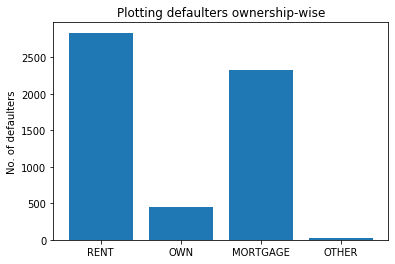

In [26]:
plt.bar(list_of_ownerships, list_of_defaulters_per_ownerships)
plt.ylabel('No. of defaulters')
#plt.xticks(rotation=90)
plt.title('Plotting defaulters ownership-wise')
plt.show()

In [27]:
list_of_verification_status = list(df_charged_off['verification_status'].unique())
print(list_of_verification_status)
list_of_defaulters_per_verification_status = []
for status in list_of_verification_status:
    #print(grade)
    list_of_defaulters_per_verification_status.append(len(df_charged_off[df_charged_off['verification_status']==status]))
print(list_of_defaulters_per_verification_status)

['Source Verified', 'Verified', 'Not Verified']
[1434, 2051, 2142]


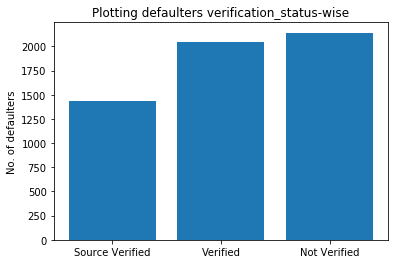

In [28]:
plt.bar(list_of_verification_status, list_of_defaulters_per_verification_status)
plt.ylabel('No. of defaulters')
#plt.xticks(rotation=90)
plt.title('Plotting defaulters verification_status-wise')
plt.show()

# BI-VARIATE ANALYSIS

DTI vs Funded Amount_INV

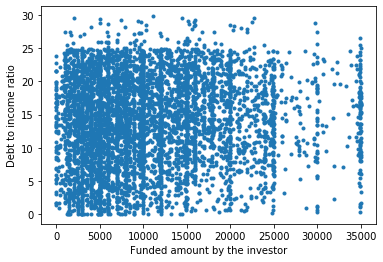

In [29]:
plt.scatter(df_charged_off['funded_amnt_inv'], df_charged_off['dti'], marker=".")
plt.ylabel('Debt to income ratio')
plt.xlabel('Funded amount by the investor')
plt.show()

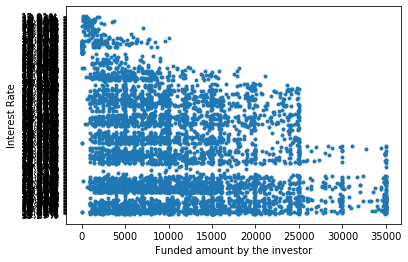

In [30]:
plt.scatter(df_charged_off['funded_amnt_inv'], df_charged_off['int_rate'], marker=".")
plt.ylabel('Interest Rate')
plt.xlabel('Funded amount by the investor')
plt.show()

In [31]:
list_of_purposes = list(df_charged_off['purpose'].unique())
print(list_of_purposes)
list_of_dt_avg_per_purpose = []
for purpose in list_of_purposes:
    #print(grade)
    list_of_dt_avg_per_purpose.append(round(df_charged_off[df_charged_off['purpose']==purpose]['dti'].mean(), 2))
print(list_of_dt_avg_per_purpose)

['car', 'small_business', 'other', 'debt_consolidation', 'major_purchase', 'credit_card', 'home_improvement', 'moving', 'vacation', 'house', 'medical', 'wedding', 'renewable_energy', 'educational']
[11.86, 11.76, 13.21, 15.14, 11.65, 15.42, 12.1, 12.4, 13.89, 11.25, 12.22, 12.3, 13.27, 11.05]


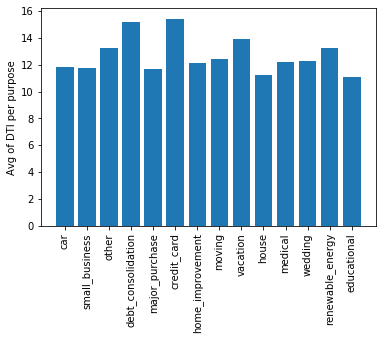

In [32]:
plt.bar(list_of_purposes, list_of_dt_avg_per_purpose)
plt.ylabel('Avg of DTI per purpose')
plt.xticks(rotation=90)
plt.show()

In [33]:
df_charged_off["int_rate"] = df_charged_off["int_rate"].astype('category')
df_charged_off["int_rate_numeric"] = df_charged_off["int_rate"].cat.codes
df_charged_off["sub_grade"] = df_charged_off["sub_grade"].astype('category')
df_charged_off["sub_grade_numeric"] = df_charged_off["sub_grade"].cat.codes
df_charged_off["home_ownership"] = df_charged_off["home_ownership"].astype('category')
df_charged_off["home_ownership_numeric"] = df_charged_off["home_ownership"].cat.codes
df_charged_off["verification_status"] = df_charged_off["verification_status"].astype('category')
df_charged_off["verification_status_numeric"] = df_charged_off["verification_status"].cat.codes
df_charged_off["purpose"] = df_charged_off["purpose"].astype('category')
df_charged_off["purpose_numeric"] = df_charged_off["purpose"].cat.codes 

C:\Users\ganguso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ganguso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ganguso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

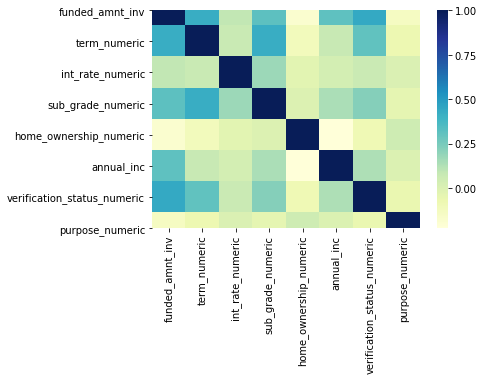

In [34]:
cor_matrix = corr_matirx = df_charged_off[['funded_amnt_inv','term_numeric','int_rate_numeric','sub_grade_numeric','home_ownership_numeric','annual_inc','verification_status_numeric','purpose_numeric']].corr()
sns.heatmap(corr_matirx, cmap="YlGnBu")

## Recommendations - 

1) Grades (B,C,D) - The loans under these grades are risky

2) Sub-Grades (B5, C1, B2, B4, B3, C2, D3, D5, C3) - The loans under these grades are especially risky

3) The loans under the purpose 'debt-consolidation' are risky

4) The loans under the ownership status 'Rent' and 'Mortgage' are risky

5) Frequency of frauds for low funded amount and high interest rate is very high, although the opposite is not TRUE. Reduction of interest rates for low funded amount is advised 

6) Since the average debt-to-income ratio for the purpose of debt consolidation, credit card and vacation is on the higher side. Putting a conservative threshold for the debt-to-income ratio is advised.